In [19]:
import pandas as pd
from textblob import TextBlob
from tqdm import tqdm

import pandas as pd

# Leer el archivo parquet usando la ruta relativa
df = pd.read_parquet('../data/Starbucks_reviews_ETL_limpio.parquet')

# Mostrar las primeras filas del dataframe para verificar que se ha leído correctamente
print(df.head())

                     user_id             name                time  rating  \
28071  100107003653040726165   Jacob McCalpin 2017-09-21 09:22:11       5   
28072  108921061266588850634           Alex Z 2018-10-03 12:11:08       2   
28073  115087327175786879005   James Drummond 2019-05-06 01:42:12       1   
28074  103797448577708424762  Matthew Pearson 2019-04-19 12:10:35       1   
28075  104674782787422072897       Craig Winn 2018-08-19 00:06:29       5   

                                                    text  \
28071  Chanel is the greatest barista of all time. I'...   
28072  The food is always warm and delicious but the ...   
28073  The location is a franchise of sorts operated ...   
28074  Go to the one in Sterne. This place is a mess....   
28075                       Open early and well staffed.   

                                     gmap_id  
28071  0x88891beed225fed1:0x3c63ad3e69972d22  
28072  0x88891beed225fed1:0x3c63ad3e69972d22  
28073  0x88891beed225fed1:0x3c63ad3

In [20]:
# Inicializar TQDM para pandas
tqdm.pandas()

# Definir una función para clasificar el sentimiento
def classify_sentiment(text):
    if pd.isna(text):
        return 1  # Treat NaN as Neutral
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0:
        return 2  # Positive
    elif analysis.sentiment.polarity < 0:
        return 0  # Negative
    else:
        return 1  # Neutral

# Aplicar la función a la columna 'Texto'
df['sentiment'] = df['text'].progress_apply(classify_sentiment)

# Mostrar un head del dataframe para mostrar la nueva columna
df.head()

100%|██████████| 156729/156729 [00:10<00:00, 15521.47it/s]


,user_id,name,time,rating,text,gmap_id,sentiment
28071,100107003653040726165,Jacob McCalpin,2017-09-21 09:22:11,5,Chanel is the greatest barista of all time. I'...,0x88891beed225fed1:0x3c63ad3e69972d22,2
28072,108921061266588850634,Alex Z,2018-10-03 12:11:08,2,The food is always warm and delicious but the ...,0x88891beed225fed1:0x3c63ad3e69972d22,0
28073,115087327175786879005,James Drummond,2019-05-06 01:42:12,1,The location is a franchise of sorts operated ...,0x88891beed225fed1:0x3c63ad3e69972d22,0
28074,103797448577708424762,Matthew Pearson,2019-04-19 12:10:35,1,Go to the one in Sterne. This place is a mess....,0x88891beed225fed1:0x3c63ad3e69972d22,0
28075,104674782787422072897,Craig Winn,2018-08-19 00:06:29,5,Open early and well staffed.,0x88891beed225fed1:0x3c63ad3e69972d22,2


In [21]:
df.to_parquet('starbucks_reviews_con_sentiment.parquet')

C:\Users\zimme\AppData\Local\Temp\ipykernel_12012\553021322.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


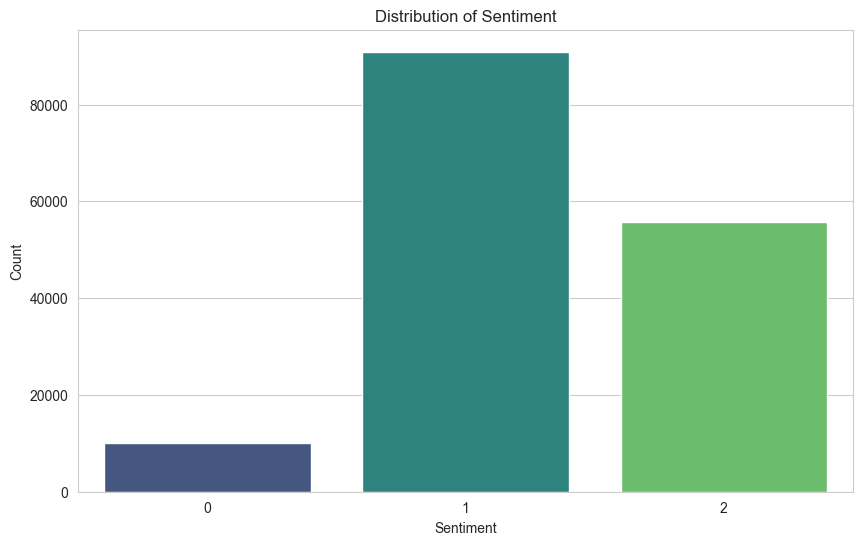

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Count plot for sentiment
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Conclusión: Este gráfico confirma las observaciones del box plot, mostrando la densidad de las calificaciones para cada tipo de sentimiento. Las reseñas positivas (2) tienen una alta densidad de calificaciones altas, mientras que las reseñas negativas (0) tienen una alta densidad de calificaciones bajas. Las reseñas neutrales (1) muestran una distribución más dispersa de calificaciones.

C:\Users\zimme\AppData\Local\Temp\ipykernel_12012\384513317.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='rating', data=df, palette='viridis')


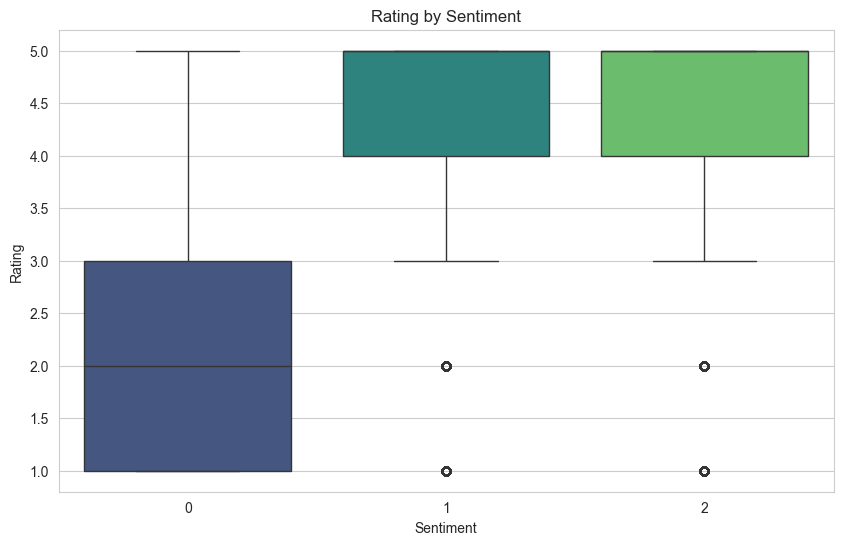

In [24]:
# Box plot for rating by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='rating', data=df, palette='viridis')
plt.title('Rating by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Rating')
plt.show()


- Conclusión: La mayoría de las reseñas tienen un sentimiento positivo (2), seguido por las reseñas neutrales (1) y finalmente las reseñas negativas (0). Esto sugiere que, en general, los clientes tienen una percepción positiva de Starbucks.

C:\Users\zimme\AppData\Local\Temp\ipykernel_12012\2937024449.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='sentiment', y='rating', data=df, palette='viridis')


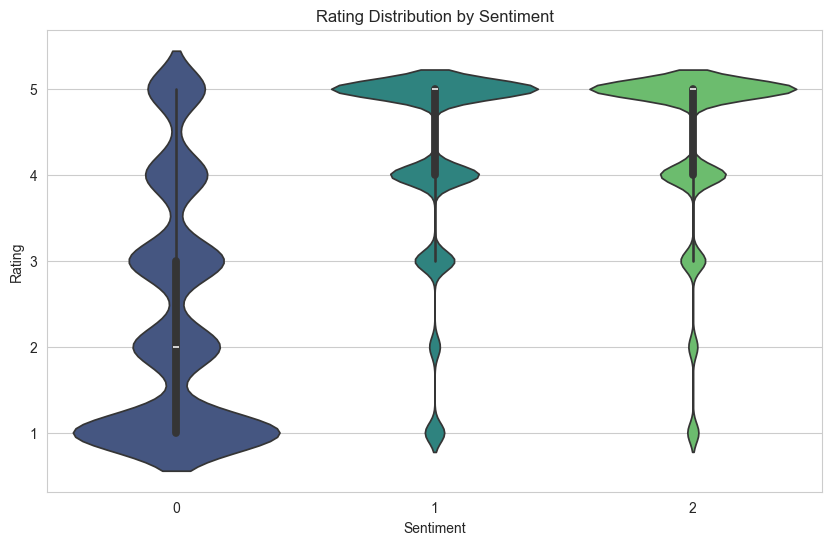

In [25]:
# Violin plot for rating by sentiment
plt.figure(figsize=(10, 6))
sns.violinplot(x='sentiment', y='rating', data=df, palette='viridis')
plt.title('Rating Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Rating')
plt.show()

Conclusión: Las calificaciones varían significativamente según el sentimiento. Las reseñas con sentimiento positivo (2) tienden a tener calificaciones más altas, mientras que las reseñas negativas (0) tienen calificaciones más bajas. Las reseñas neutrales (1) tienen una distribución de calificaciones más amplia, pero generalmente se encuentran en el rango medio.

<Figure size 1500x1000 with 0 Axes>

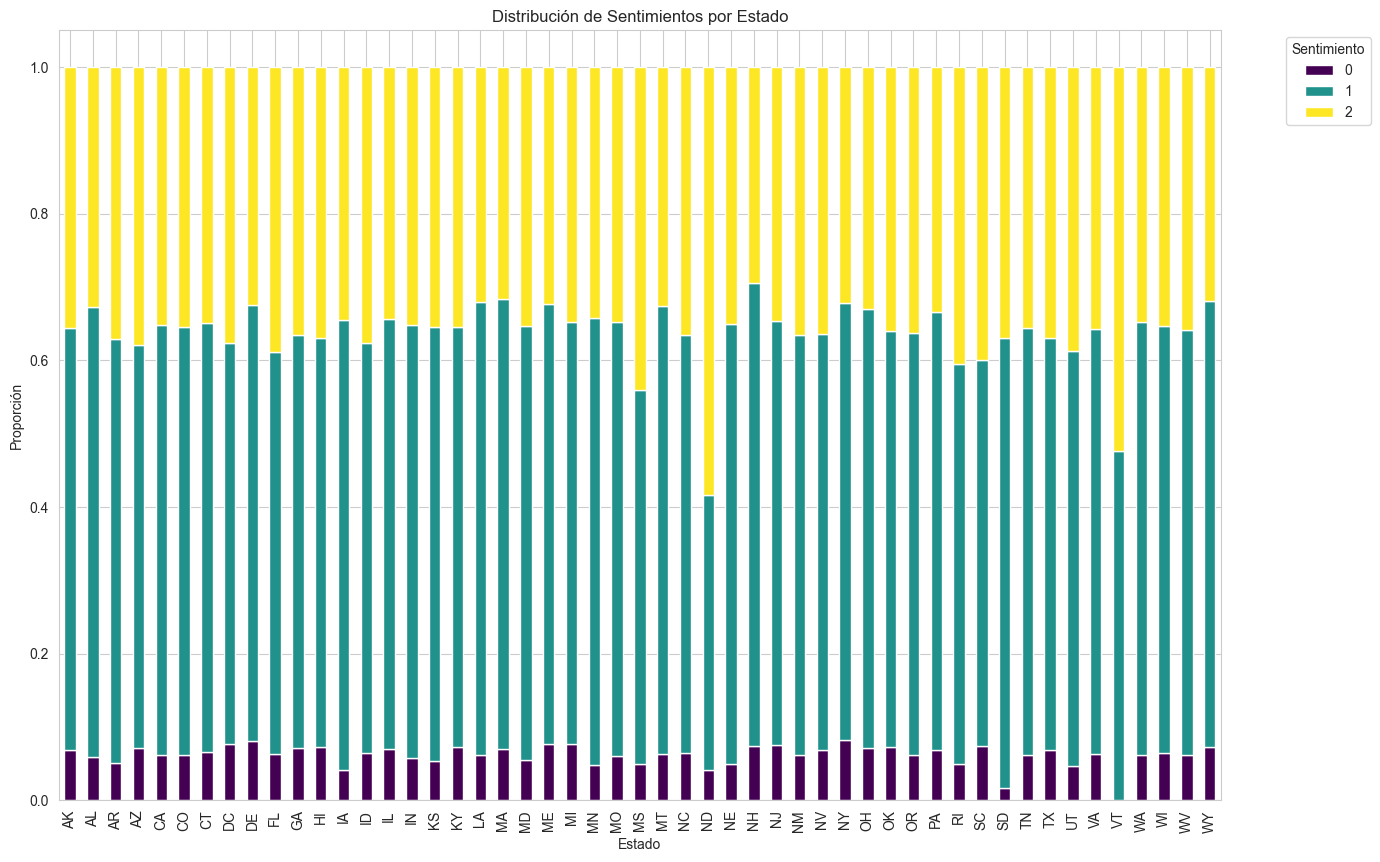

In [27]:
# Cargar los dataframes desde los archivos parquet
df = pd.read_parquet('../data/starbucks_reviews_con_sentiment.parquet')
df1 = pd.read_parquet('../data/Starbucks_metadata_ETL_limpio.parquet')

# Unir los dataframes en una columna común (asumiendo que 'gmap_id' es la columna común)
df_unido = pd.merge(df, df1, on='gmap_id')

# Agrupar por estado y sentimiento para obtener el conteo de cada sentimiento por estado
conteo_sentimientos_estado = df_unido.groupby(['state', 'sentiment']).size().unstack(fill_value=0)

# Normalizar los conteos para obtener la proporción de cada sentimiento por estado
proporciones_sentimientos_estado = conteo_sentimientos_estado.div(conteo_sentimientos_estado.sum(axis=1), axis=0)

# Graficar la distribución de sentimientos por estado
plt.figure(figsize=(15, 10))
proporciones_sentimientos_estado.plot(kind='bar', stacked=True, colormap='viridis', figsize=(15, 10))
plt.title('Distribución de Sentimientos por Estado')
plt.xlabel('Estado')
plt.ylabel('Proporción')
plt.legend(title='Sentimiento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [28]:
print(proporciones_sentimientos_estado)

sentiment         0         1         2
state                                  
AK         0.068116  0.575362  0.356522
AL         0.059675  0.613020  0.327306
AR         0.051174  0.578020  0.370805
AZ         0.070822  0.550685  0.378493
CA         0.061540  0.586537  0.351922
CO         0.061332  0.584286  0.354382
CT         0.065504  0.584786  0.349709
DC         0.076816  0.547486  0.375698
DE         0.081481  0.594444  0.324074
FL         0.063062  0.548789  0.388149
GA         0.071628  0.563545  0.364827
HI         0.072647  0.557170  0.370183
IA         0.041623  0.613944  0.344433
ID         0.064386  0.559356  0.376258
IL         0.069361  0.587606  0.343032
IN         0.057218  0.590924  0.351858
KS         0.053837  0.591065  0.355097
KY         0.072650  0.572650  0.354701
LA         0.061818  0.618182  0.320000
MA         0.069524  0.613473  0.317003
MD         0.054545  0.591736  0.353719
ME         0.076807  0.599398  0.323795
MI         0.076550  0.575336  0.348115
